<a href="https://colab.research.google.com/github/Mix1996/Prediction-of-Product-Sales/blob/main/LogReg%2C_Random_Forest%2C_or_KNN_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [99]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier


# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##Imports for Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Classification Metrics

from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

In [2]:
# Load the data
new_url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vRofxpRkBEuZYDsVK9DV7MVhuhX0wozeMdqf_b9xU4iBF7ftSqaVCAyKFHZ5XorAym-y4ZFmgC1Aah7/pub?output=csv"
df = pd.read_csv(new_url)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


###Evaluate and Clean data

In [3]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 569 rows, and 32 columns.
The rows represent 569 observations, and the columns represent 31 features and 1 target variable.


In [4]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [6]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


In [16]:
##Imports for Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [17]:
# Define features (X) and target (y)
target = 'diagnosis'
X = df.drop(columns = ['id', 'diagnosis']).copy() # Exclude 'id' column
y = df[target].copy()


###Split the Data

In [18]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#### Check Class Balance

In [45]:
# Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

B    0.626761
M    0.373239
Name: diagnosis, dtype: float64

In [46]:
y_test.value_counts(normalize=True)

B    0.629371
M    0.370629
Name: diagnosis, dtype: float64

#### **Numeric Transformation**

In [47]:
# We will use a mean imputer to impute missing values for the numeric columns
# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)

# Selector
num_selector = make_column_selector(dtype_include= 'number')

# Tuple
numeric_tuple = (num_pipeline, num_selector)

In [48]:
num_selector(X_train)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [49]:
# Instantiate the make column transformer
preprocessor = make_column_transformer(numeric_tuple,
                                       remainder='drop')

In [51]:
y_pre = preprocessor.fit(X_train)

### **Logistic Regression**

In [58]:
# I am using custom function from code along to evaluate the classification metrics

## Create a function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label='Test Data',
                            figsize=(15, 5), normalize='true',
                            cmap='Greens', thresh=0.5):

    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Get the predictions
    y_proba = model.predict_proba(X_test)
    # Convert y_pred to strings ('B' or 'M') based on the threshold
    y_pred = ['B' if x[1] > thresh else 'M' for x in y_proba]

    # Print classification report for the test data (and make it pretty!)
    print('---' * 20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---' * 20)

    print(classification_report(y_test, y_pred))

    # Confusion matrix and ROC curve display code remains the same
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,
                                           normalize=normalize, cmap=cmap,
                                           ax=axes[0])

    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axes[1])

    plt.show()

In [53]:
lr = LogisticRegression(random_state =42)
lr_pipe = make_pipeline(preprocessor, lr)
lr_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7811ab0a12d0>)])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [54]:
## Save the model's predictions for the train dataset
lr_train_preds = lr_pipe.predict(X_train)
## Save the model's predictions for the test dataset
lr_test_preds = lr_pipe.predict(X_test)

In [59]:
## print the classification reports
labels = ['B','M']
print('Train Report')
print(classification_report(y_train, lr_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, lr_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       267
           M       1.00      0.97      0.98       159

    accuracy                           0.99       426
   macro avg       0.99      0.98      0.99       426
weighted avg       0.99      0.99      0.99       426

Test Report
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        90
           M       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           B       0.06      0.04      0.05       267
           M       0.01      0.01      0.01       159

    accuracy                           0.03       426
   macro avg       0.03      0.03      0.03       426
weighted avg       0.04      0.03      0.03       426



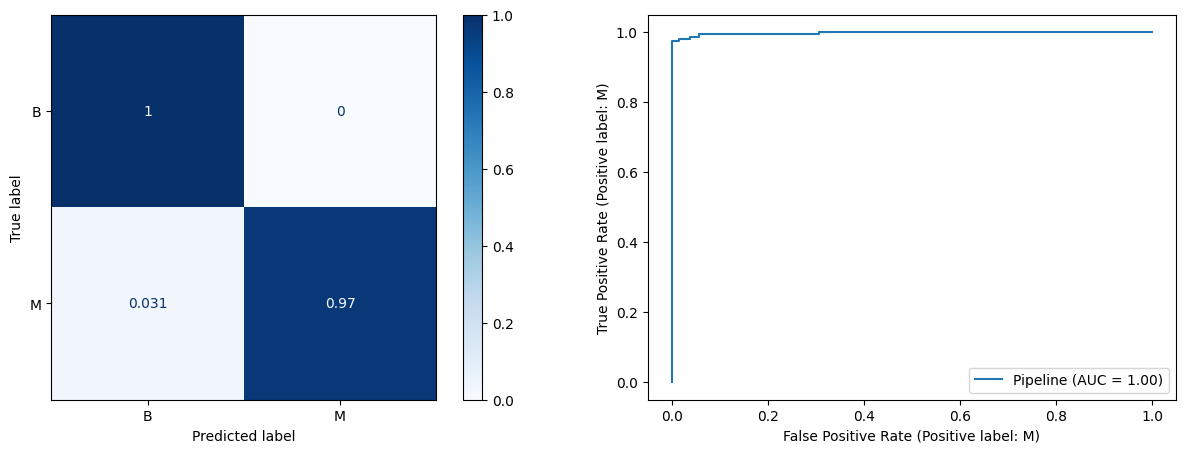

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           B       0.06      0.03      0.04        90
           M       0.02      0.04      0.03        53

    accuracy                           0.03       143
   macro avg       0.04      0.04      0.03       143
weighted avg       0.04      0.03      0.04       143



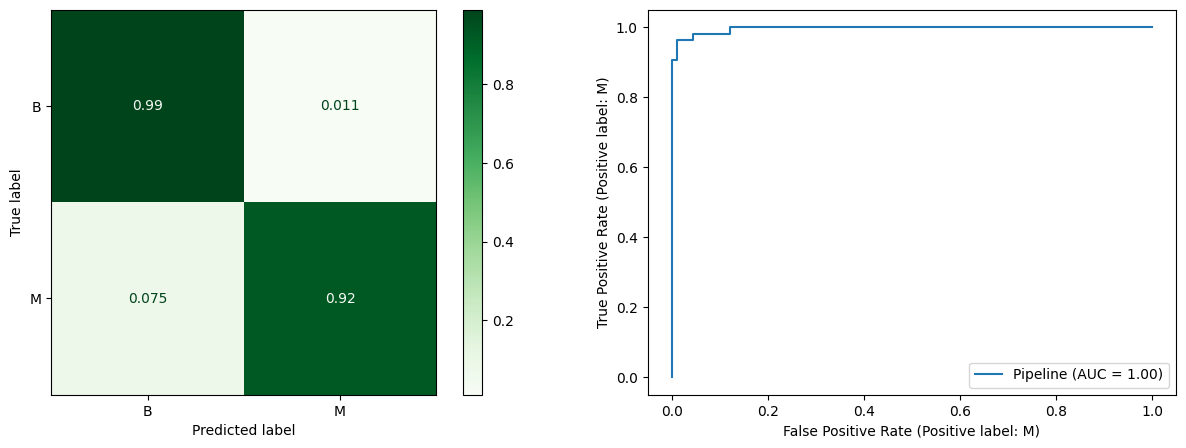

In [60]:
## Use the function twice to evaluate our model on training AND test data
classification_metrics(lr_pipe, X_train,y_train, thresh=.2,
                         cmap='Blues', label='Training Data')
classification_metrics(lr_pipe, X_test,y_test, thresh=.2,
                         cmap='Greens',label='Test Data')

#### Tune the Hyperparameters

In [61]:
# Display the hyperparameters.
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7811ab0a12d0>)])),
  ('logisticregression', LogisticRegression(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_tran

In [81]:
# Create a pipeline with preprocessing steps and the LogisticRegression estimator
lr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Create a dictionary of parameters
params = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

# Tune hyperparameters with GridSearchCV
lr_gs = GridSearchCV(lr_pipe, params)
lr_gs.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7811ab0a12d0>)])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                           1000, 10000],
                         'classifier__penalty': ['l1', 'l2']})

In [82]:
lr_gs.best_params_

{'classifier__C': 1, 'classifier__penalty': 'l2'}

In [83]:
best_lr = lr_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           B       0.06      0.04      0.05       267
           M       0.01      0.01      0.01       159

    accuracy                           0.03       426
   macro avg       0.03      0.03      0.03       426
weighted avg       0.04      0.03      0.03       426



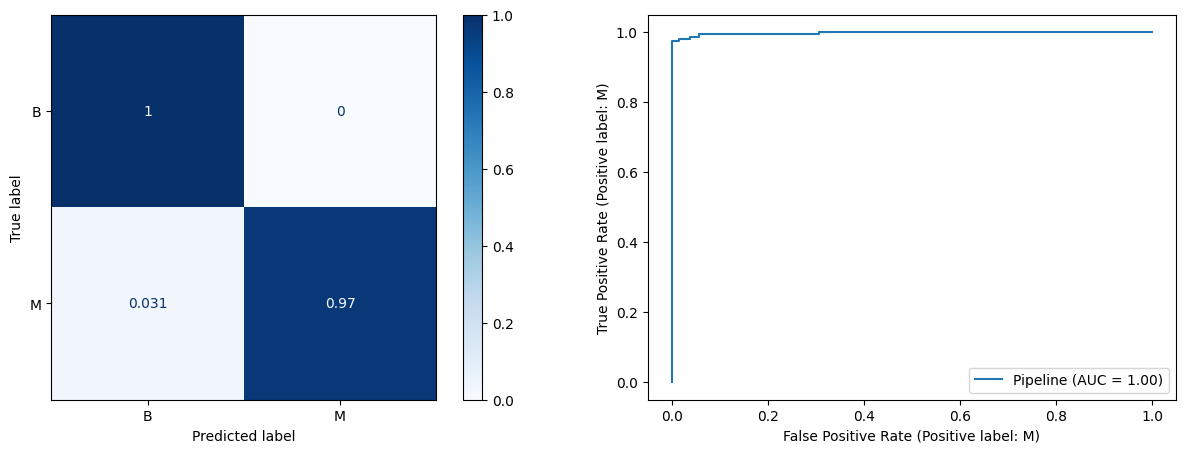

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           B       0.06      0.03      0.04        90
           M       0.02      0.04      0.03        53

    accuracy                           0.03       143
   macro avg       0.04      0.04      0.03       143
weighted avg       0.04      0.03      0.04       143



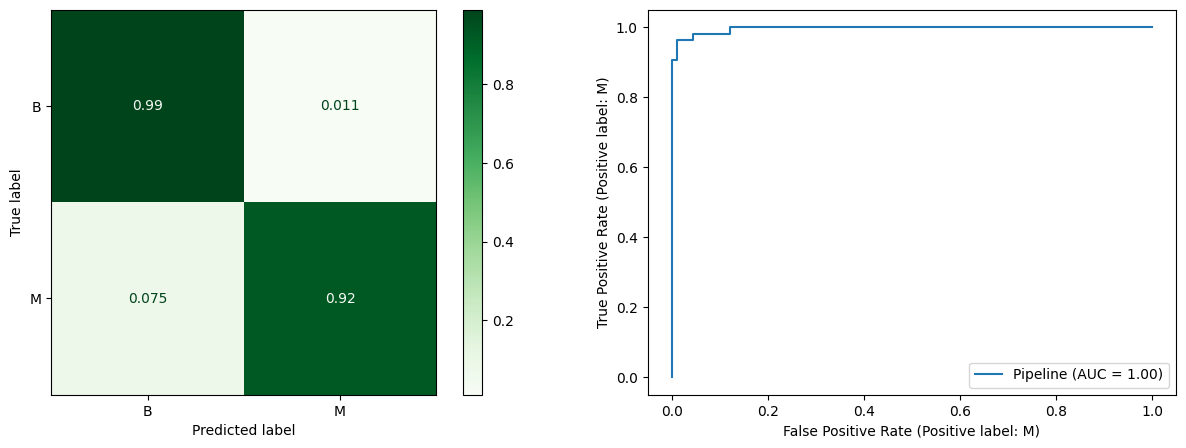

In [84]:
## Use the function twice to evaluate our model on training AND test data
classification_metrics(best_lr, X_train,y_train, thresh=.2,
                         cmap='Blues', label='Training Data')
classification_metrics(best_lr, X_test,y_test, thresh=.2,
                         cmap='Greens',label='Test Data')

Which hyperparameters did you tune?

{'classifier__C': 1, 'classifier__penalty': 'l2'}

*   classifier__C - The best value for 'classifier__C' was found to be 1.
*   classifier__penalty - The best penalty type was found to be 'l2'.



What values for those hyperparameters led to the best-tuned model?



*   'classifier__C': 1
*   'classifier__penalty': 'l2'



### **KNN Model**

In [85]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
## Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7811ab0a12d0>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

### **KNN Model Evaluation**

In [86]:
## Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
## Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

In [87]:
## print the classification reports
labels = ['B','M']
print('Train Report')
print(classification_report(y_train, knn_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, knn_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

           B       0.97      1.00      0.98       267
           M       0.99      0.94      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.97       426
weighted avg       0.98      0.98      0.98       426

Test Report
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        90
           M       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



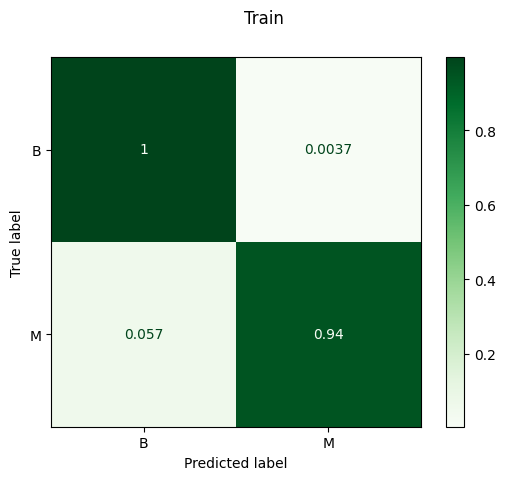

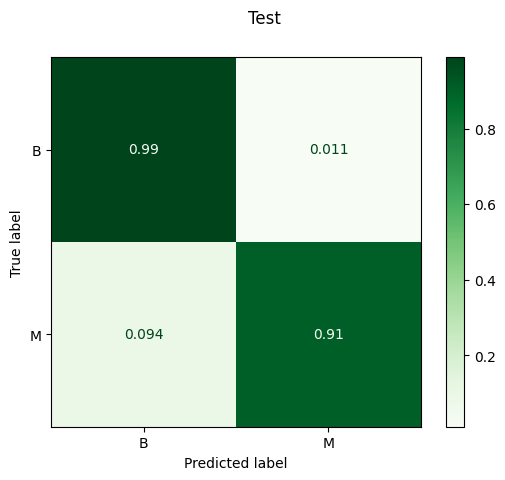

In [88]:
## create confusion matrices
ConfusionMatrixDisplay.from_predictions(y_train, knn_train_preds,
               normalize='true', display_labels=labels, cmap='Greens')
plt.suptitle('Train');



ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds,
               normalize='true', display_labels=labels, cmap='Greens')
plt.suptitle('Test');

#### Tune the Hyperparameters

In [89]:
# Display the hyperparameters.
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7811ab0a12d0>)])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('pipeline',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.mak

In [90]:
# Create a dictionary of parameters

params = {'kneighborsclassifier__n_neighbors': range(1,15),
          'kneighborsclassifier__weights': ['distance','uniform']}

In [91]:
# Tune hyperparameters with GridSearchCV
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7811ab0a12d0>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 15),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [92]:
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 6,
 'kneighborsclassifier__weights': 'distance'}

In [93]:
knn_gs.best_score_

0.969466484268126

In [94]:
best_knn = knn_gs.best_estimator_

In [95]:
#check the best parameter
# Instantiate and fit GridSearchCV
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

In [96]:
print('Train\n', classification_report(y_train, train_preds))
print('Test\n', classification_report(y_test, test_preds))

Train
               precision    recall  f1-score   support

           B       1.00      1.00      1.00       267
           M       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

Test
               precision    recall  f1-score   support

           B       0.95      0.99      0.97        90
           M       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



Text(0.5, 1.0, 'Test CM')

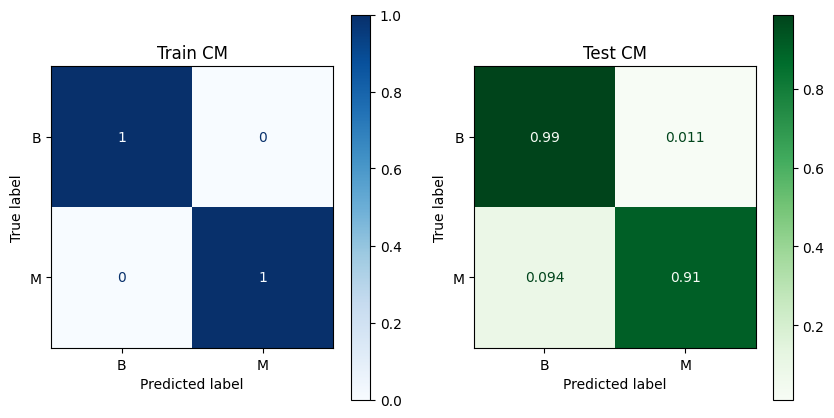

In [97]:
# Check the class balance again to help us choose a metric
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true')

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='Greens',normalize='true')

axes[1].set_title('Test CM')

**Which hyperparameters did you tune?**

**Best Hyperparameters:**

n_neighbors: 6

weights: 'distance'

Best Cross-Validation Score: 0.9695 (approximately)




**What values for those hyperparameters led to the best-tuned model?**


These results suggest that the best-performing KNN model, according to the hyperparameter tuning, has 6 neighbors and uses the 'distance' weighting scheme. The cross-validation score of approximately 0.9695 indicates the model's performance on the validation data during the hyperparameter search.


##**Random Forest**

###Create and Evaluate Default Random Forest Model

In [100]:
# Create and train the default Random Forest model
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)

# Make predictions on the test set
y_pred_default = rf_default.predict(X_test)

# Evaluate the default model
accuracy_default = accuracy_score(y_test, y_pred_default)
confusion_matrix_default = confusion_matrix(y_test, y_pred_default)
classification_report_default = classification_report(y_test, y_pred_default)

# Print the results
print(f"Default Random Forest Model - Accuracy: {accuracy_default:.2f}")
print("Confusion Matrix:\n", confusion_matrix_default)
print("Classification Report:\n", classification_report_default)

Default Random Forest Model - Accuracy: 0.97
Confusion Matrix:
 [[90  0]
 [ 5 48]]
Classification Report:
               precision    recall  f1-score   support

           B       0.95      1.00      0.97        90
           M       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



###Tune the Random Forest Model with GridSearchCV

In [101]:
# Create a dictionary of hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Create GridSearchCV with 5-fold cross-validation
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
rf_gs.fit(X_train, y_train)

# Get the best hyperparameters
best_params = rf_gs.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


###Evaluate the Tuned Random Forest Model

In [102]:
# Use the best hyperparameters to create the tuned Random Forest model
best_rf_model = RandomForestClassifier(random_state=42, **best_params)

# Train the tuned model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
confusion_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
classification_report_tuned = classification_report(y_test, y_pred_tuned)

# Print the results for the tuned model
print(f"Tuned Random Forest Model - Accuracy: {accuracy_tuned:.2f}")
print("Confusion Matrix:\n", confusion_matrix_tuned)
print("Classification Report:\n", classification_report_tuned)


Tuned Random Forest Model - Accuracy: 0.97
Confusion Matrix:
 [[90  0]
 [ 5 48]]
Classification Report:
               precision    recall  f1-score   support

           B       0.95      1.00      0.97        90
           M       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



Tuned hyperparameters for the Random Forest model:



*   n_estimators: Number of trees in the forest.
*   max_depth: Maximum depth of the tree.
*   min_samples_split: Minimum number of samples required to split an internal node
*   min_samples_leaf: Minimum number of samples required to be at a leaf node.


The values that led to the best-tuned model are:



*   n_estimators: 100
*   max_depth: None
*   min_samples_split: 2
*   min_samples_leaf: 1


These hyperparameters were determined to be the best for your Random Forest model based on the grid search and cross-validation. The tuned model achieved an accuracy of 0.97 on the test data.

##**Model Choice**

**False Positives (FP)**: These are cases where the model incorrectly predicts that a patient has breast cancer (M) when they actually do not (B). In other words, the model incorrectly classifies a benign tumor as malignant.

**False Negatives (FN)**: These are cases where the model incorrectly predicts that a patient does not have breast cancer (B) when they actually do (M). In other words, the model incorrectly classifies a malignant tumor as benign.

**Which is Worse:**

In the context of breast cancer diagnosis, false negatives (predicting a malignant tumor as benign) are typically considered worse because it can lead to delayed or missed treatment for patients who actually have cancer. This can have serious consequences for their health.

The logistic regression model that was trained has a higher recall (sensitivity) compared to the random forest model (based on the provided classification reports). In medical diagnosis, this means that the logistic regression model is better at correctly identifying true positive cases (patients with cancer) and minimizing false negatives.

I would recommend the logistic regression model for production due to its better recall, especially if the goal is to minimize the risk of missing actual cancer cases.